# Greedy algorithms
Simple greedy algorithms to solve TSP are quite effective, giving an approximation factor of $\Theta\left(\log|V|\right)$.

![Nearest Neighbour algorithm for a TSP with 7 cities. The solution changes as the starting point is changed](https://upload.wikimedia.org/wikipedia/commons/2/23/Nearestneighbor.gif)

A greedy TSP solver starts at an arbitrary $V$ and then chooses the node that has the lowest edge weight that it has not already visited.

An implementation of this is contained in `algs.py` under `simple_greed`.


In [2]:
from algs import simple_greed
print(simple_greed.__doc__)

Takes p and produces a tour from a start node n by choosing
    the node with the lowest weight that it hasn't already visited.
    
    p :: [TSP-problem networkx graph]
    n :: [Integer] Start node
    
    returns: tour of p
    


In [1]:
%matplotlib inline
from parsers import TSP
from parstats import dist_across_cost, scatter_vis, cost_progress_trace, get_stats
from graphgen import EUC_2D
from algs import brute_force
import itertools as it
import seaborn as sns
import pandas as pd
import numpy as np

Let's try it out some and try to interpret the results.
This graph has 280 nodes in it, and is spec, given by the `spec` method is:


In [3]:
tsp_prob = TSP(file="../data/a280.tsp")
print(tsp_prob.spec)

Namespace(comment='drilling problem (Ludwig)', dimension=280, edge_weight_type='EUC_2D', name='a280', type='EUC_2D')


`EUC_2D` is a distance metric, so each $V$ is represented by a 2-tuple, and the edge weight between $V_n$ and $V_m$ is given by their (integer rounded) eucliean distance, $\texttt{int}\left( \sqrt{\sum \left(V_n - V_m\right)^2}\right)$

Let's start a cluster so we can run several agents at once.

In [3]:
%%bash
./cluster.sh 100

2016-12-17 11:30:36.277 [IPClusterStop] Stopping cluster [pid=8097] with [signal=<Signals.SIGINT: 2>]
Cluster up with 100 engines


We want to visualize the cost of each agent, the lowest, highest, and distribution of costs. We can also use the visuallization of the cost as the agent moves along to find out what's going on.

In [5]:
@get_stats(name="Simple greedy approach, small graph",
           data=tsp_prob,
           plots=[dist_across_cost, scatter_vis, cost_progress_trace])
def vis_greedy(*args, **kwargs):
    return simple_greed(*args, **kwargs)

importing os on engine(s)
importing posix on engine(s)


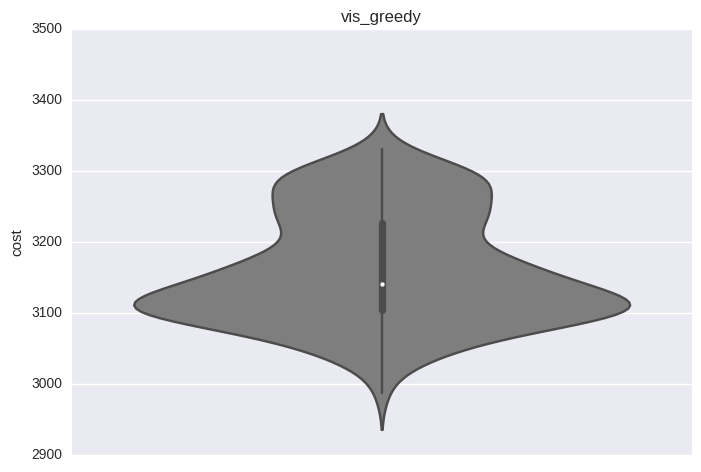

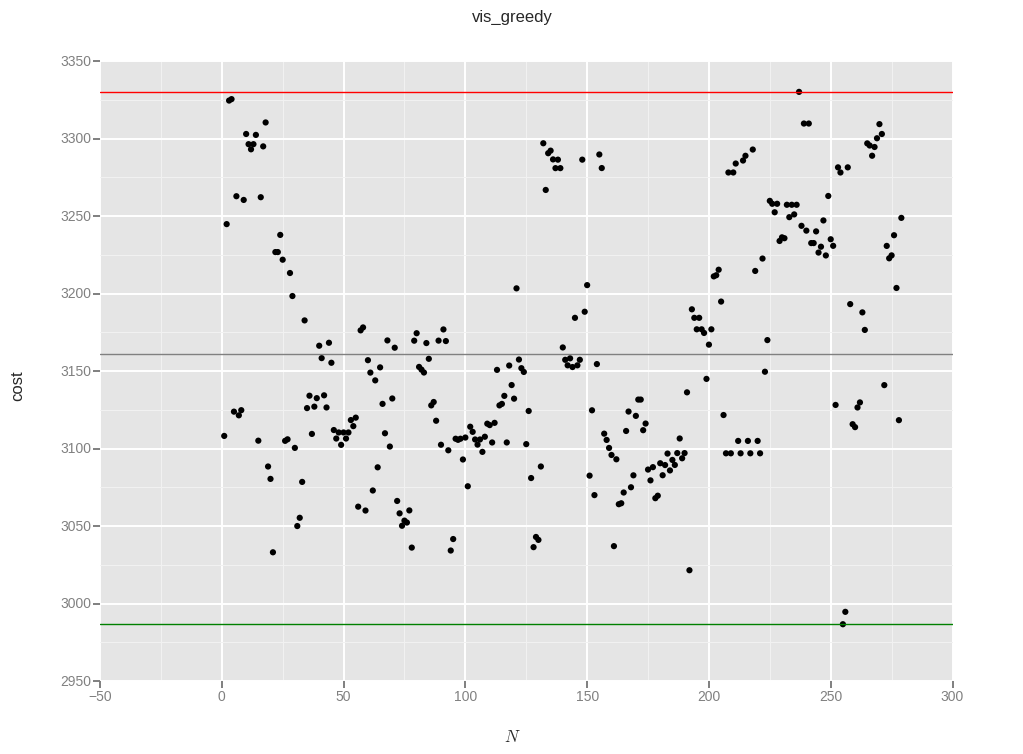

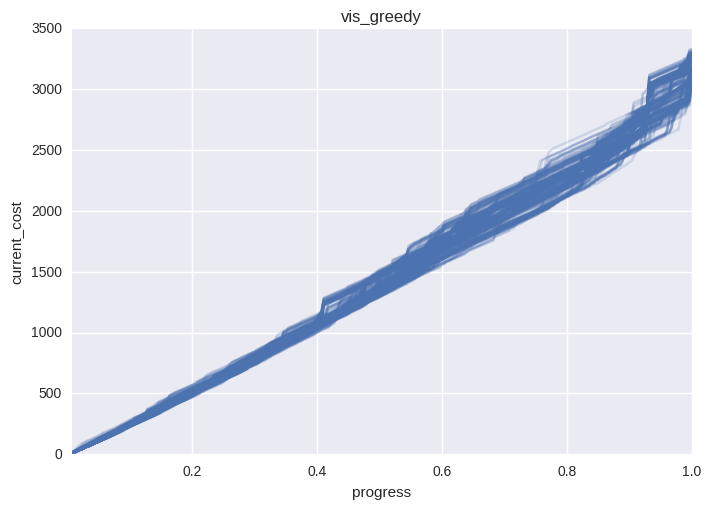

In [6]:
vis_greedy(range(1, tsp_prob.spec.dimension));

In [7]:
%%bash
./cluster.sh 100

2016-12-16 05:47:35.341 [IPClusterStop] Stopping cluster [pid=1369] with [signal=<Signals.SIGINT: 2>]
Cluster up with 100 engines


In [8]:
tsp_prob2 = TSP("../data/rl1889.tsp")

@get_stats(name="Simple greedy approach, large graph",
           data=tsp_prob2,
           plots=[dist_across_cost, scatter_vis, cost_progress_trace])
def vis_greedy(*args, **kwargs):
    return simple_greed(*args, **kwargs)

importing os on engine(s)
importing posix on engine(s)


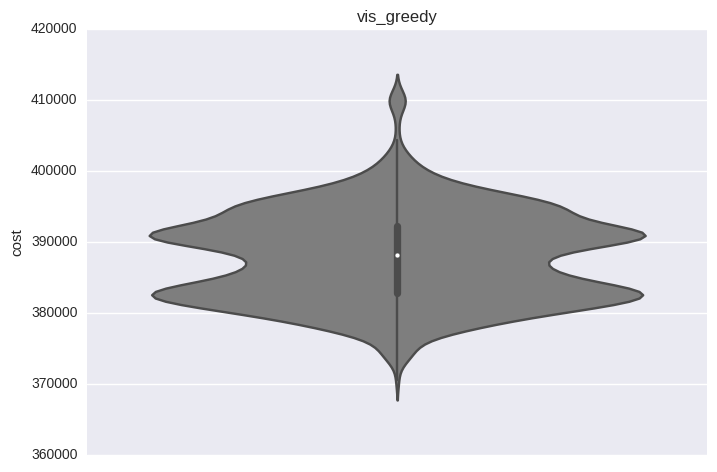

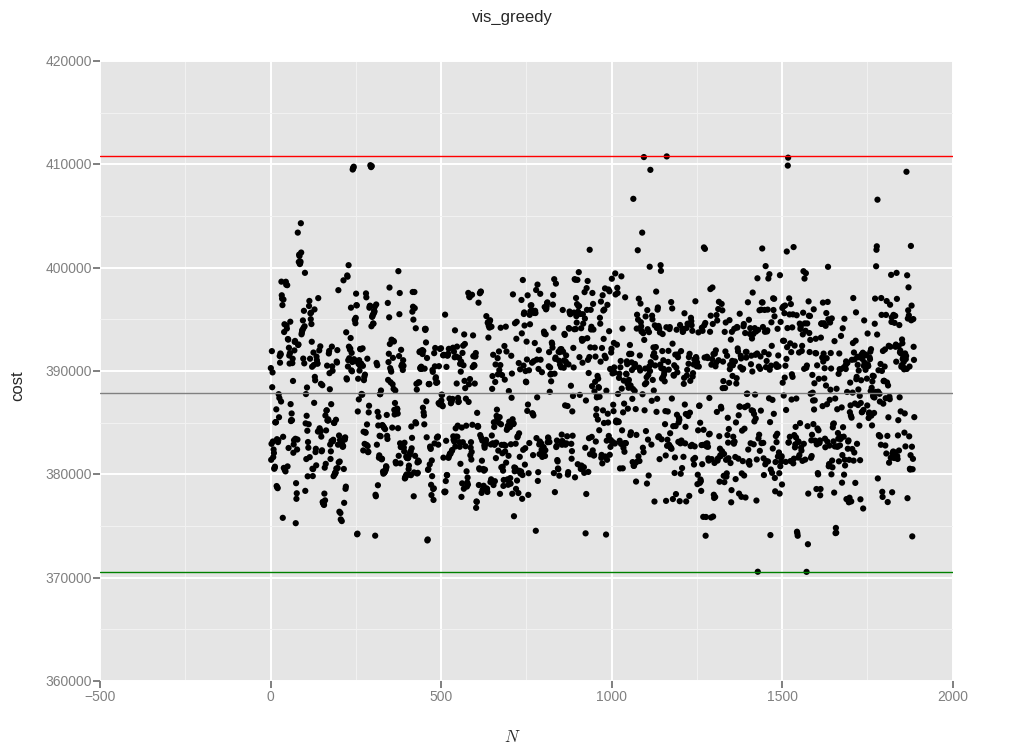

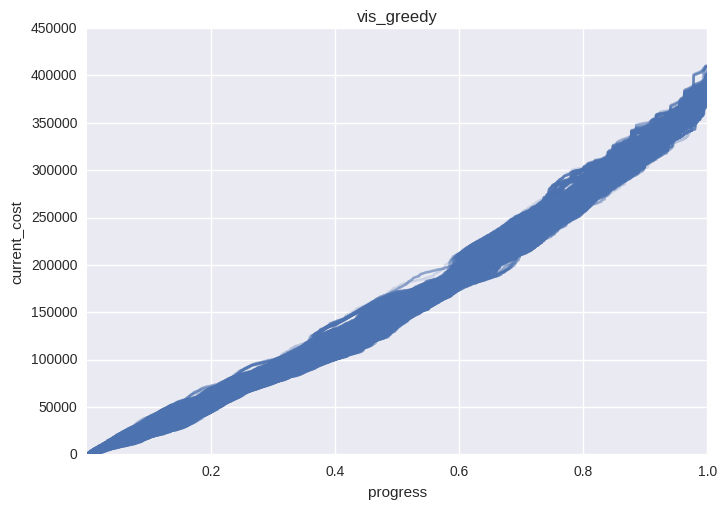

In [9]:
vis_greedy(range(1, tsp_prob2.spec.dimension));

# Ant-colony optimization

Ant colony optimization is an expansion of a probabalistic greedy agent. From Wikipedia, the ant's ruleset is:

1. It must visit each city exactly once;
2. A distant city has less chance of being chosen (the visibility);
3. The more intense the pheromone trail laid out on an edge between two cities, the greater the probability that that edge will be chosen;
4. Having completed its journey, the ant deposits more pheromones on all edges it traversed, if the journey is short;
5. After each iteration, trails of pheromones evaporate.

Let's visualize what this looks like by comparing the distribution (KDE) across costs with a simple greedy algorithm and a simple greedy algorithim that works after an ant-colony optimizaton.


In [10]:
%%bash
./cluster.sh 100

2016-12-16 06:34:45.068 [IPClusterStop] Stopping cluster [pid=2605] with [signal=<Signals.SIGINT: 2>]
Cluster up with 100 engines


This generates a 30-node graph, and runs an ant colony optimization across it.

In [11]:
tsp_prob = TSP('../data/a280.tsp')
tsp_prob.graph = EUC_2D(30)
tsp_prob.spec = dict(comment="Random euclidean graph",
                     dimension=30,
                     edge_weight_type="EUC_2D",
                     name="Random cities")

@get_stats(name="Ant-colony, small graph",
           data=tsp_prob,
           plots=[dist_across_cost])
def vis_ant_results(*args, **kwargs):
    return ant_colony(*args, **kwargs, n_ants=1000)

In [12]:
@get_stats(name="Ant-colony without ants, small graph",
           data=tsp_prob,
           plots=[dist_across_cost])
def vis_greedy(*args, **kwargs):
    return simple_greed(*args, **kwargs)

importing os on engine(s)
importing posix on engine(s)


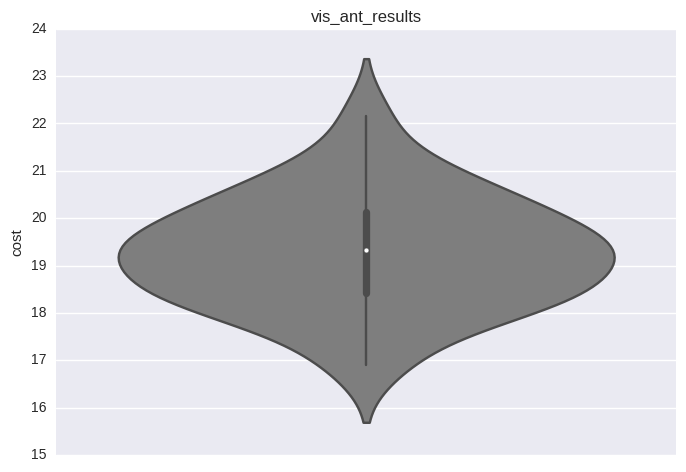

In [13]:
vis_ant_results(range(0, 30));

versus the simple greedy algorithim

importing os on engine(s)
importing posix on engine(s)


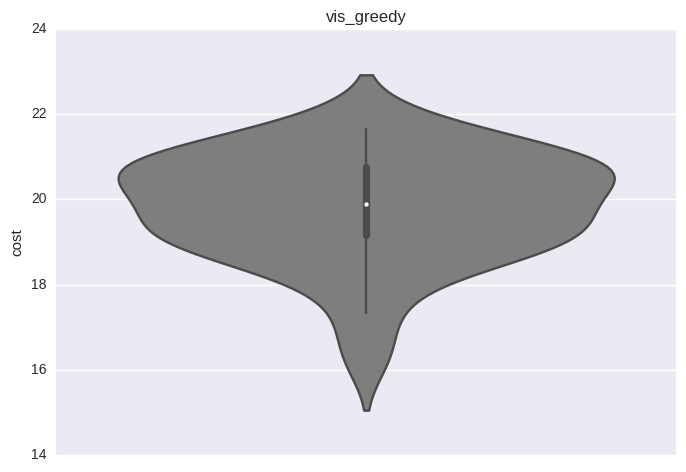

In [14]:
vis_greedy(range(0, 30));

For most graphs, the ant-colony pre optimization works pretty well, bringing down the cost distribution, at the cost of taking more time. This is true even with very simple cost functions to compare the weight of the edge and the pheromone level.
This is how the comparison scales to larger graphs, and to more ants.

importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing 

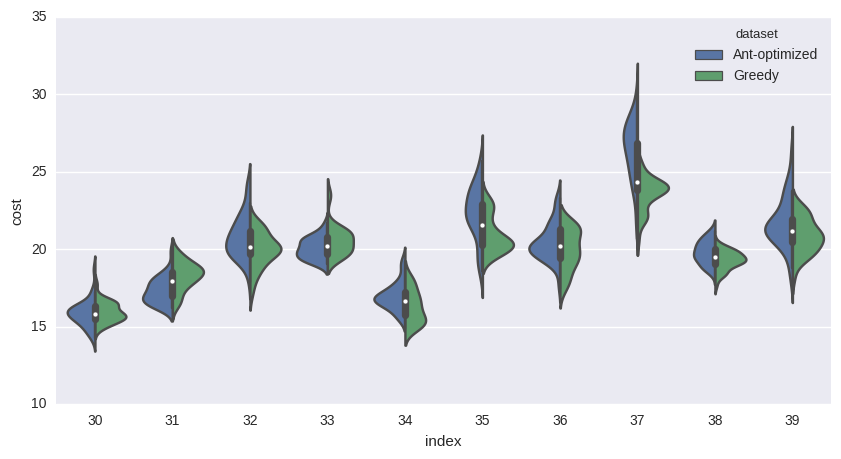

In [15]:
def vis_across_graph_sizes(start_size, end_size):
    tsp_prob = TSP('../data/a280.tsp')
    tsp_prob.spec = dict(comment="Random euclidean graph",
                         dimension=start_size,
                         edge_weight_type="EUC_2D",
                         name="Random cities")
    ant_runs = []
    greedy_runs = []
    
    for graph_size in range(start_size, end_size):
        r_graph = EUC_2D(graph_size)
        tsp_prob.graph = r_graph
        tsp_prob.spec['dimension'] = graph_size
        
        @get_stats(name="Ant colony graph size {}".format(graph_size),
                   data=tsp_prob)
        def vis_ant_graph(*args, **kwargs):
            return ant_colony(*args, **kwargs, n_ants=1000)
        
        @get_stats(name="Greedy comparison - graph size {}".format(graph_size),
                   data=tsp_prob)
        def vis_greedy_graph(*args, **kwargs):
            return simple_greed(*args, **kwargs)
        
        ant_cost, _ = vis_ant_graph(range(0, graph_size))
        greed_cost, _ = vis_greedy_graph(range(0, graph_size))
        ant_cost['index'] = graph_size
        ant_cost['dataset'] = "Ant-optimized"
        greed_cost['index'] = graph_size
        greed_cost['dataset'] = "Greedy"
        ant_runs.append(ant_cost)
        greedy_runs.append(greed_cost)
        
    ant_data = pd.concat(ant_runs)
    greedy_data = pd.concat(greedy_runs)
    data = pd.concat([ant_data, greedy_data]).reset_index()
    
    sns.plt.figure(figsize=(10, 5))
    sns.violinplot(x="index", y="cost", hue="dataset", data=data, split=True)
    return data


res = vis_across_graph_sizes(30, 40)

importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)


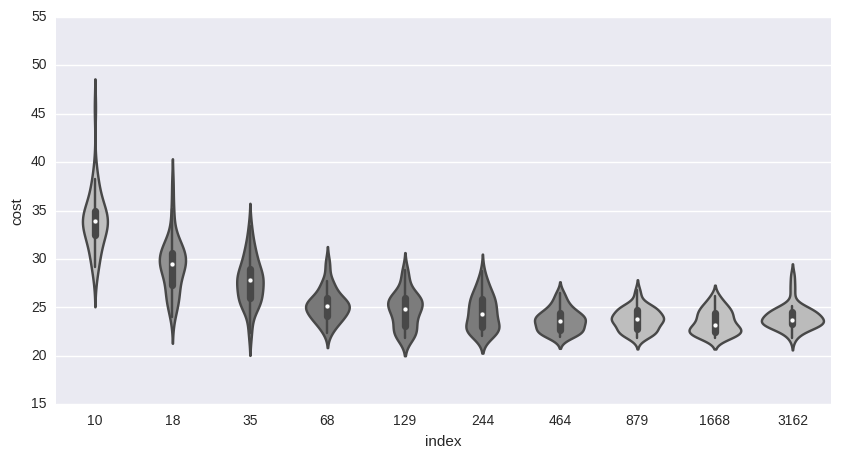

In [4]:
def vis_across_ant_N(tsp_size, n_ants_min, n_ants_max):
    tsp_prob = TSP('../data/a280.tsp')
    tsp_prob.spec = dict(comment="Random euclidean graph",
                         dimension=tsp_size,
                         edge_weight_type="EUC_2D",
                         name="Random cities")
    tsp_prob.graph = EUC_2D(tsp_size)
    tsp_prob.spec['dimension'] = tsp_size
    
    ant_runs = []
    
    for n_ants in np.logspace(n_ants_min, n_ants_max, num=10):
        @get_stats(name="Ant colony graph size {}".format(tsp_size),
                   data=tsp_prob)
        def vis_ant_graph(*args, **kwargs):
            return ant_colony(*args, **kwargs, n_ants=int(n_ants))
        
        ant_cost, _ = vis_ant_graph(range(0, tsp_prob.spec['dimension']))
        ant_cost['index'] = int(n_ants)
        ant_runs.append(ant_cost)
        
    ant_data = pd.concat(ant_runs).reset_index()
    
    sns.plt.figure(figsize=(10, 5))
    sns.violinplot(x="index", y="cost", data=ant_data, saturation=0)
    return ant_data


res = vis_across_ant_N(40, 1, 3.5)

If we directly slice the above graph, running a cost distribution across `n_ants=100` to `n_ants=1000` we can see what the impact is for a given graph.

importing os on engine(s)
importing posix on engine(s)


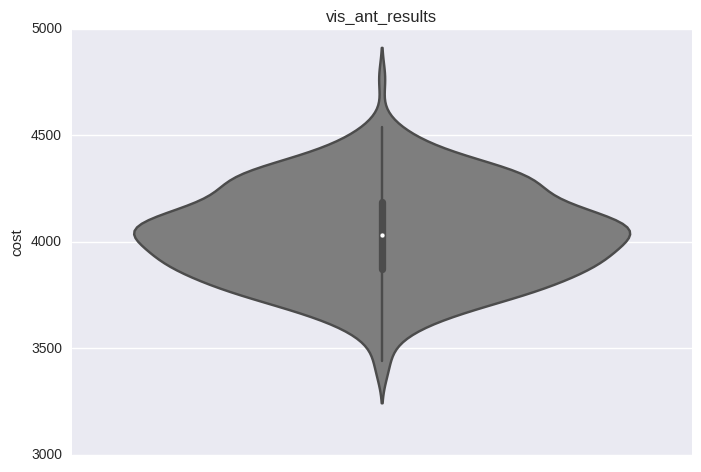

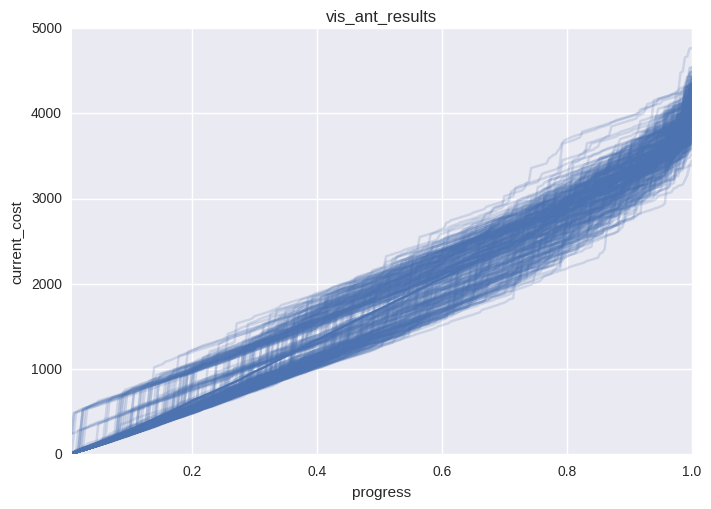

In [18]:
tsp_prob = TSP('../data/a280.tsp')
    
@get_stats(name="Ant-colony, medium graph",
           data=tsp_prob,
           plots=[dist_across_cost, cost_progress_trace])
def vis_ant_results(*args, **kwargs):
    return ant_colony(*args, **kwargs, n_ants=100)

@get_stats(name="Ant-colony without ants, medium graph",
           data=tsp_prob,
           plots=[dist_across_cost, cost_progress_trace])
def vis_greedy(*args, **kwargs):
    return simple_greed(*args, **kwargs)
vis_ant_results(range(1, tsp_prob.spec.dimension));

importing os on engine(s)
importing posix on engine(s)


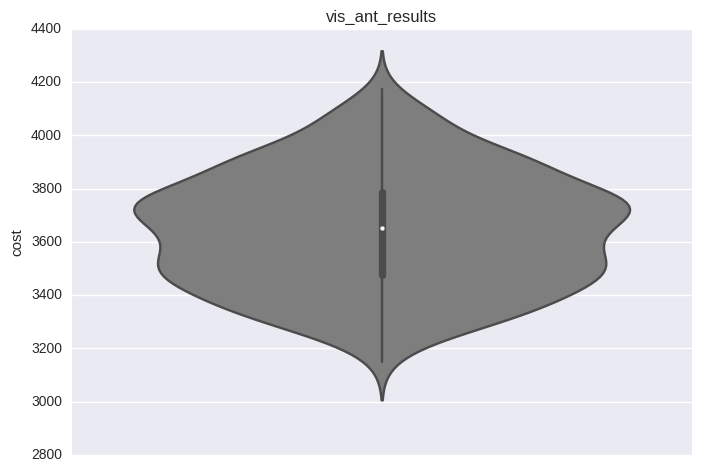

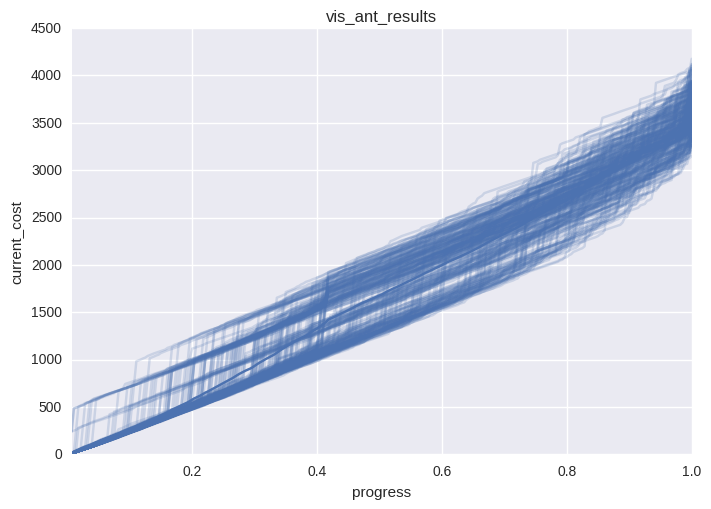

In [19]:
@get_stats(name="Ant-colony, medium graph, more ants (x10)",
           data=tsp_prob,
           plots=[dist_across_cost, cost_progress_trace])
def vis_ant_results(*args, **kwargs):
    return ant_colony(*args, **kwargs, n_ants=1000)
vis_ant_results(range(1, tsp_prob.spec.dimension));

importing os on engine(s)
importing posix on engine(s)


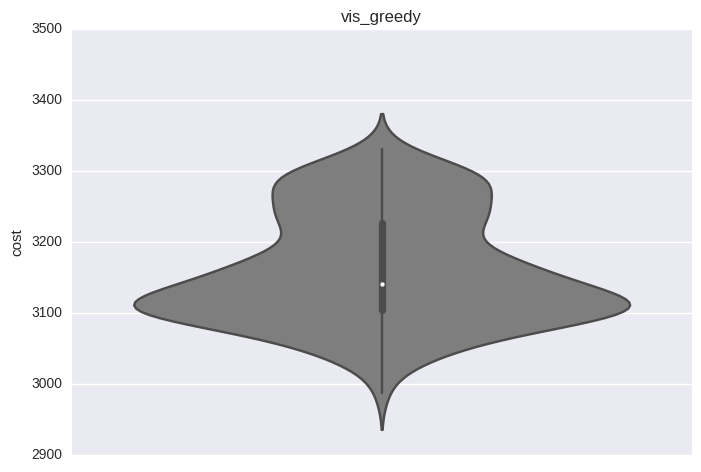

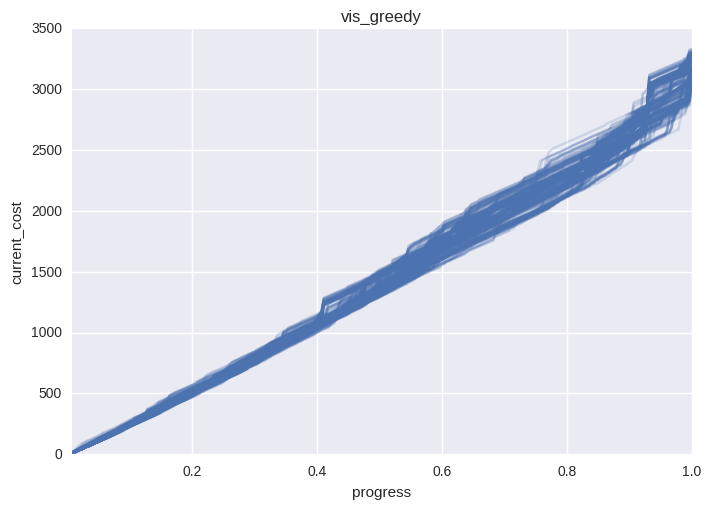

In [21]:
vis_greedy(range(1, tsp_prob.spec.dimension));

Now that we've seen the specific case, let's see how the greedy algorithims perform as we change the size of the graph. Let $N$ be the size of a randomly generated euclideian 2-dimensional graph. The performance should be measured relative to the optimal tour's cost, and let's visualize the distribution across each greedy agent.

Our final summation figure is a comparison between the cost distributions of an ant-colony model and a simple greedy one, comparing both to the optimal tour, while varying the dimension of the graph.

Due to the need to have the exact best tour, let's do this for $4 \leq N \leq 12$, so we sidestep the issue of solving TSP on large graphs.

In [7]:
def vis_across_graph_sizes(start_size, end_size):
    tsp_prob = TSP('../data/a280.tsp')
    tsp_prob.spec = dict(comment="Random euclidean graph",
                         dimension=start_size,
                         edge_weight_type="EUC_2D",
                         name="Random cities")
    ant_runs = []
    greedy_runs = []
    opt_cost = []
    
    for graph_size in range(start_size, end_size):
        r_graph = EUC_2D(graph_size)
        tsp_prob.graph = r_graph
        tsp_prob.spec['dimension'] = graph_size
        opt_cost.append(pd.DataFrame(dict(cost=brute_force(r_graph)[0].cost,
                                          index=graph_size)))
        
        @get_stats(name="Ant colony graph size {}".format(graph_size),
                   data=tsp_prob)
        def vis_ant_graph(*args, **kwargs):
            return ant_colony(*args, **kwargs, n_ants=3000)
        
        @get_stats(name="Greedy comparison - graph size {}".format(graph_size),
                   data=tsp_prob)
        def vis_greedy_graph(*args, **kwargs):
            return simple_greed(*args, **kwargs)
        
        ant_cost, _ = vis_ant_graph(range(0, graph_size))
        greed_cost, _ = vis_greedy_graph(range(0, graph_size))
        ant_cost['index'] = graph_size
        ant_cost['dataset'] = "Ant-optimized"
        greed_cost['index'] = graph_size
        greed_cost['dataset'] = "Greedy"
        ant_runs.append(ant_cost)
        greedy_runs.append(greed_cost)
        
    ant_data = pd.concat(ant_runs)
    greedy_data = pd.concat(greedy_runs)
    opt_data = pd.concat(opt_cost)
    data = pd.concat([ant_data, greedy_data]).reset_index()
    
    sns.plt.figure(figsize=(10, 5))
    sns.violinplot(x="index", y="cost", hue="dataset", data=data, split=True, inner="stick", bw=0.4)
    sns.stripplot(x="index", y="cost", data=opt_data, color="R")
    return (data, opt_data)

importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)
importing os on engine(s)
importing posix on engine(s)


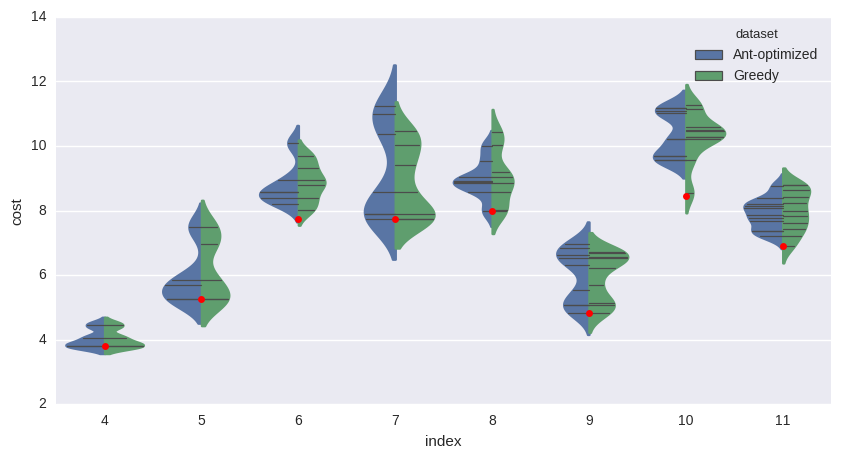

In [8]:
res = vis_across_graph_sizes(4, 12)